# Random Forest Classifier Model Prediction

In [1]:
# Importing all necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Store the data into the df variable

df = pd.read_csv('EA-1.csv')

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
#View some basic statistical details like percentile, mean, standard deviation etc.

df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
#The number of rows and number of columns in the data

df.shape

(1470, 35)

In [7]:
#Observing DataTypes

df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

# Null Values

In [8]:
#Checking for null values

df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [9]:
#Get a count of the number of employee attrition, the number of employees that stayed (no) and the number that left (yes)

df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

# Exploratory Data Analysis 

To analysing the data using visual techniques. To discover trends and patterns with the help of statistical summary and graphical representation.

83.87755155563354
16.122448444366455


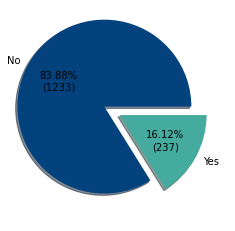

In [10]:
def per_val(x):
    print(x)
    return '{:.2f}%\n({:.0f})'.format(x, total*x/100)
v_counts = df['Attrition'].value_counts()
total = len(df['Attrition'])
fig = plt.figure()
plt.pie(v_counts, labels=v_counts.index, autopct=per_val, colors=['#04427E', '#45AB9E'], shadow=True, explode = (0.2,0));

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Attrition', ylabel='count'>

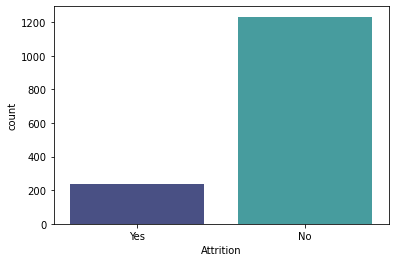

In [11]:
#Visualize this count 

sns.countplot(df['Attrition'],palette='mako')

<AxesSubplot:xlabel='Age', ylabel='count'>

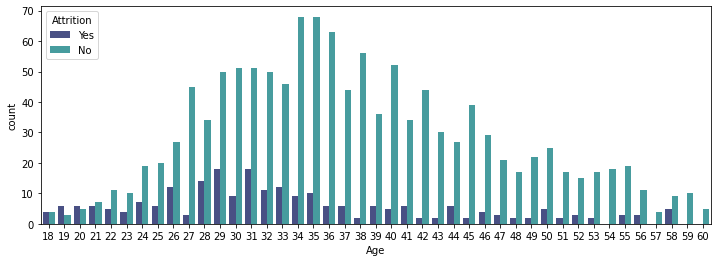

In [12]:
#Show the number of employees that left and stayed by age

plt.subplots(figsize=(12,4))
sns.countplot(x='Age', hue='Attrition', data=df, palette = 'mako')

In [13]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

df['Attrition']= label_encoder.fit_transform(df['Attrition'])

<AxesSubplot:xlabel='MaritalStatus', ylabel='Attrition'>

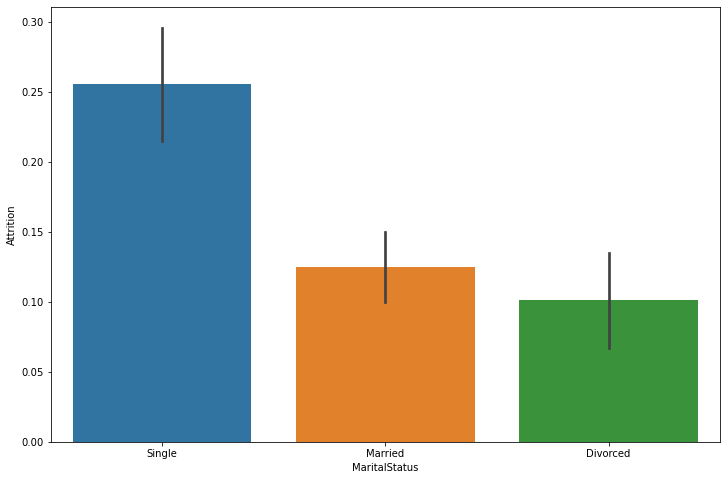

In [14]:
plt.figure(figsize=(12,8))
sns.barplot(x = 'MaritalStatus', y = 'Attrition', data=df)

<AxesSubplot:xlabel='Department', ylabel='Attrition'>

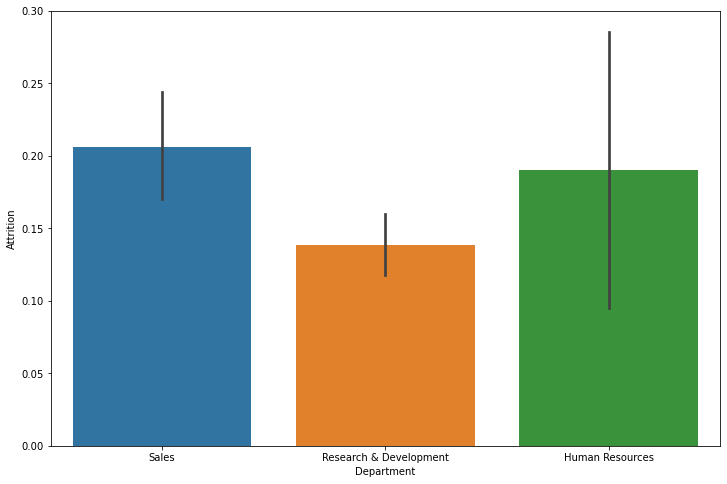

In [15]:
plt.figure(figsize=(12,8))
sns.barplot(x = 'Department', y = 'Attrition', data=df)

In [16]:
df['StandardHours'].unique()

array([80], dtype=int64)

In [17]:
#Remove unneeded columns

#Remove the column EmployeeNumber

df = df.drop("Over18", axis=1)             #Contains only 'Y' as the value
df = df.drop("EmployeeNumber", axis=1)     #Contains only value 1
df = df.drop("StandardHours", axis=1)      #Contains only the value 80
df = df.drop("EmployeeCount", axis=1)      #Contains only the value 'Yes'

# Correlation

Establishment of a connection between two segments.

In [18]:
#Get the correlation of the columns

df.corr()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,-0.056652,0.077924,-0.031373,-0.103369,-0.006846,-0.130016,-0.169105,-0.103481,...,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
DailyRate,0.010661,-0.056652,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,0.077924,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,-0.103369,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,-0.006846,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,-0.130016,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,-0.169105,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,-0.103481,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,...,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656


<AxesSubplot:>

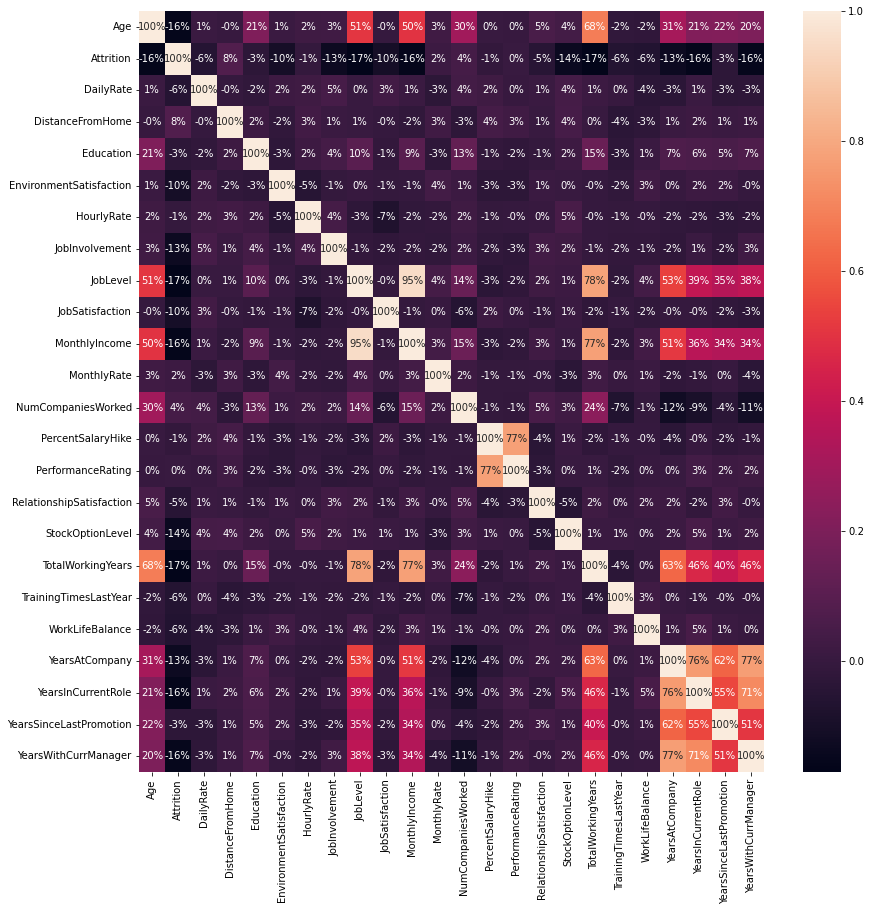

In [19]:
#Visualize the correlation

plt.figure(figsize=(14,14))
sns.heatmap(df.corr(), annot=True, fmt='.0%' )

# Label Encoder

Changing the Categorical datatypes into Numeric datatypes.

In [ ]:
#Transform non-numeric columns into numerical columns

from sklearn.preprocessing import LabelEncoder

cols = ['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']

df[cols] = df[cols].apply(LabelEncoder().fit_transform)

df.head()

In [20]:
#Create a new column at the end of the dataframe that contains the same value 

df['Age_Years'] = df['Age'] 

In [21]:
#Remove the first column called age 

df = df.drop('Age', axis=1)

In [22]:
#Show the dataframe

df.head()

,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_Years
0,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,...,1,0,8,0,1,6,4,0,5,41
1,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,...,4,1,10,3,3,10,7,1,7,49
2,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,...,2,0,7,3,3,0,0,0,0,37
3,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,...,3,0,8,3,3,8,7,3,0,33
4,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,...,4,1,6,3,3,2,2,2,2,27


In [24]:
#Split the data into independent 'X' and dependent 'Y' variables

X = df.iloc[:, 1:df.shape[1]].values
y = df.iloc[:, 0].values

# Splitting the data into Training and Testing DataSet

In [25]:
# Split the dataset into 75% Training set and 25% Testing set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Using Random Forest Classifier

A classifier that contains a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset.

In [26]:
#Using Random Forest Classification algorithm

from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0) 
#n_estimators :- The number of trees in the forest.
#criterion = 'entropy' :- Sets the degree of randomness of a particular node.
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)

print(f"Actual Values     -: {y_test[25:50]}")
print(f"Predicted Values  -: {y_pred[25:50]}")

Actual Values     -: [0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1]
Predicted Values  -: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1]


In [27]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.8641304347826086

In [28]:
#Get the accuracy on the training data

forest.score(X_train, y_train)

0.9791288566243194

# Confusion Matrix

Used to describe the performance of a classification model on a set of test data for which the true values are known.

In [29]:
#Show the confusion matrix and accuracy for  the model on the test data
#Classification accuracy is the ratio of correct predictions to total predictions made

from sklearn.metrics import confusion_matrix
y_pred = forest.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]

print(cm)
print('Model Testing Accuracy = {}'.format((TP + TN) / (TP + TN + FN + FP)))

[[309   1]
 [ 49   9]]
Model Testing Accuracy = 0.8641304347826086


C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


Model Testing Accuracy = 0.8641304347826086


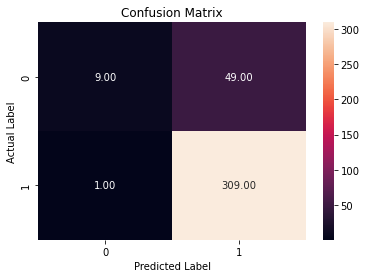

In [30]:
cm = confusion_matrix(y_test, y_pred, [1,0])
sns.heatmap(cm, annot=True, fmt='.2f',xticklabels = ["0", "1"] , yticklabels = ["0", "1"] )
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.savefig('random_forest')

print('Model Testing Accuracy = {}'.format((TP + TN) / (TP + TN + FN + FP)))

# Feature Importance

Techniques that calculate a score for all the input features for a given model

In [31]:
# Return the feature importances (the higher, the more important the feature).

importances = pd.DataFrame({'feature':df.iloc[:, 1:df.shape[1]].columns,'importance':np.round(forest.feature_importances_,3)}) 
#Note: The target column is at position 0
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

#A reduction in the impurity of a node weighted by the number of samples that are reaching that node from the total number
#of samples.

,importance
feature,
MonthlyIncome,0.071
Age_Years,0.067
DailyRate,0.067
MonthlyRate,0.055
HourlyRate,0.052
TotalWorkingYears,0.051
YearsWithCurrManager,0.048
JobRole,0.044
DistanceFromHome,0.042


<AxesSubplot:xlabel='feature'>

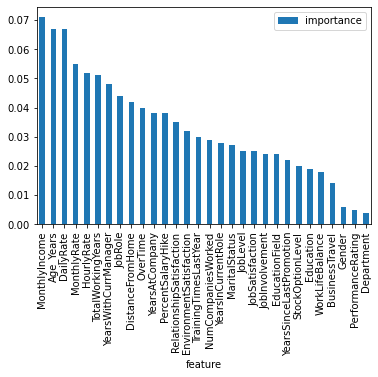

In [32]:
#Visualize the importance

importances.plot.bar()

#Feature importance based on mean decrease in impurity
#the total decrease in node impurity averaged over all trees of the ensemble.

# Prediction Of Unknown Data

To predict the targeted variable.

In [33]:
#Columns :- 1.Age,2.BusinessTravel,3.DailyRate,4.Department,5.DistanceFromHome,6.Education,7.EducationField,
#8.EnvironmentSatisfaction,9.Gender,10.HourlyRate,11.JobInvolvement,12.JobLevel,13.JobRole,14.JobSatisfaction,
#15.MaritalStatus,16.MonthlyIncome,17.MonthlyRate,18.NumCompaniesWorked,19.OverTime,20.PercentSalaryHike,
#21.PerformanceRating,22.RelationshipSatisfaction,23.StockOptionLevel,24.TotalWorkingYears,25.TrainingTimesLastYear,
#26.WorkLifeBalance,27.YearsAtCompany,28.YearsInCurrentRole,29.YearsSinceLastPromotion,30.YearsWithCurrManager

unknown_data1 = (25,1,1372,2,18,1,3,1,1,93,4,2,3,3,1,6232,12477,2,0,11,3,2,2,6,3,2,3,2,1,2)

In [34]:
import numpy as np

unknown_data_np1 = np.asarray(unknown_data1) 
unknown_data1 = unknown_data_np1.reshape(1,-1)   #to store the data into an two dim array so that is easily used to predict
prediction_1 = forest.predict(unknown_data1)       
print(prediction_1)

[0]


In [35]:
if(prediction_1[0]==0):
    print("The employee is currently working in the company.")
else:
    print("The employee left the company.")

The employee is currently working in the company.
